In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('iris.csv').drop(columns='Unnamed: 0',axis=1)

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


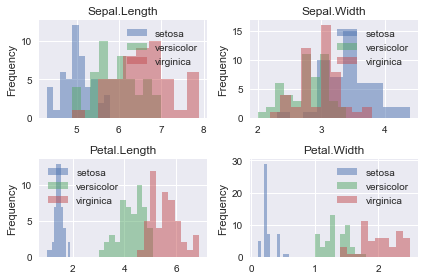

In [4]:
for n , i in enumerate(df.drop(columns='Species').columns):
    plt.subplot(2,2, n+1)
    df.groupby('Species')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['Species'].unique())
    plt.title(i)
    plt.tight_layout()

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #this post
from sklearn.metrics import classification_report

In [8]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'Sepal.Length':'Petal.Width'], df['Species'], test_size=.33 , random_state=11238)

In [13]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
lda_model.priors_.round(2)

array([0.32, 0.35, 0.33])

In [15]:
lda_model.means_.round(2)

array([[5.08, 3.54, 1.47, 0.27],
       [5.96, 2.8 , 4.32, 1.35],
       [6.57, 2.96, 5.52, 2.05]])

In [16]:
lda_model.coef_

array([[  6.00531776,  11.58512358, -14.96625342, -21.90925818],
       [ -1.832109  ,  -3.70832024,   4.79020568,   1.82865095],
       [ -3.88019252,  -7.30099231,   9.43220941,  19.30586298]])

In [17]:
lda_class_pred = lda_model.predict(X_test)

In [21]:
import lec4_graphs as afx

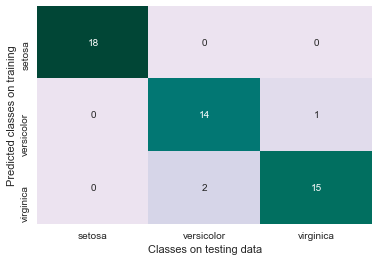

In [22]:
afx.plot_confusion_matrix(y_test, lda_class_pred, ['setosa','versicolor','virginica'])

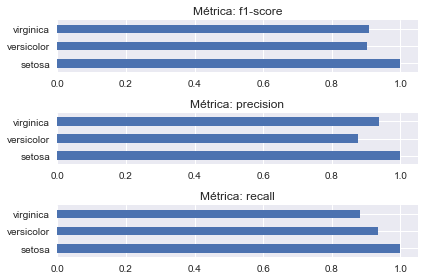

In [23]:
afx.plot_class_report(y_test,lda_class_pred,['setosa','versicolor','virginica'])

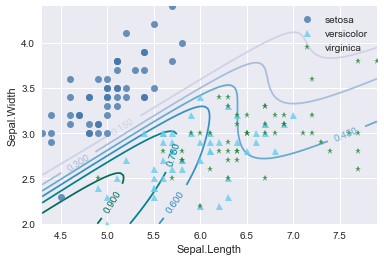

In [24]:
afx.probability_contours(LinearDiscriminantAnalysis(),df.loc[:,'Sepal.Length':'Petal.Width'], df['Species'],'Sepal.Length','Sepal.Width',['setosa','versicolor','virginica'])

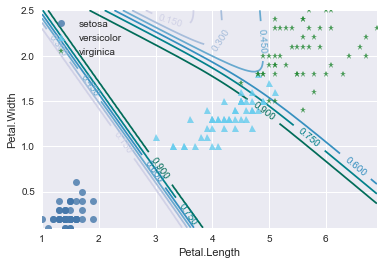

In [25]:
afx.probability_contours(LinearDiscriminantAnalysis(),df.loc[:,'Sepal.Length':'Petal.Width'], df['Species'],'Petal.Length','Petal.Width',['setosa','versicolor','virginica'])

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train,y_train)
qda_predict = qda_model.predict(X_test)

In [28]:
afx.confusion_matrix(y_test,qda_predict)

array([[18,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 17]])

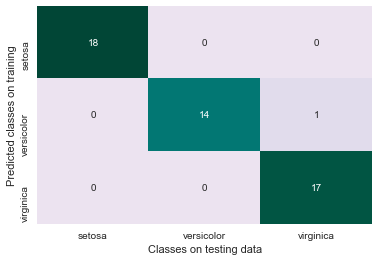

In [31]:
afx.plot_confusion_matrix(y_test,qda_predict,['setosa','versicolor','virginica'])

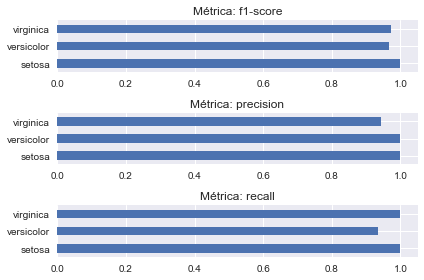

In [32]:
afx.plot_class_report(y_test, qda_predict,['setosa','versicolor','virginica'])

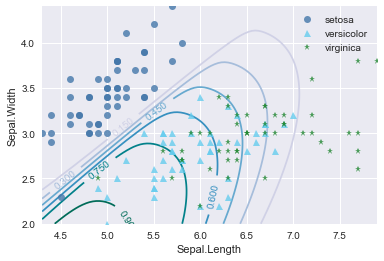

In [33]:
afx.probability_contours(QuadraticDiscriminantAnalysis(),df.loc[:,'Sepal.Length':'Petal.Width'], df['Species'],'Sepal.Length','Sepal.Width',['setosa','versicolor','virginica'])

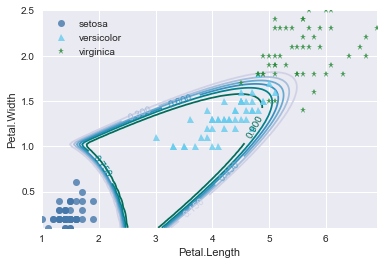

In [34]:
afx.probability_contours(QuadraticDiscriminantAnalysis(),df.loc[:,'Sepal.Length':'Petal.Width'], df['Species'],'Petal.Length','Petal.Width',['setosa','versicolor','virginica'])